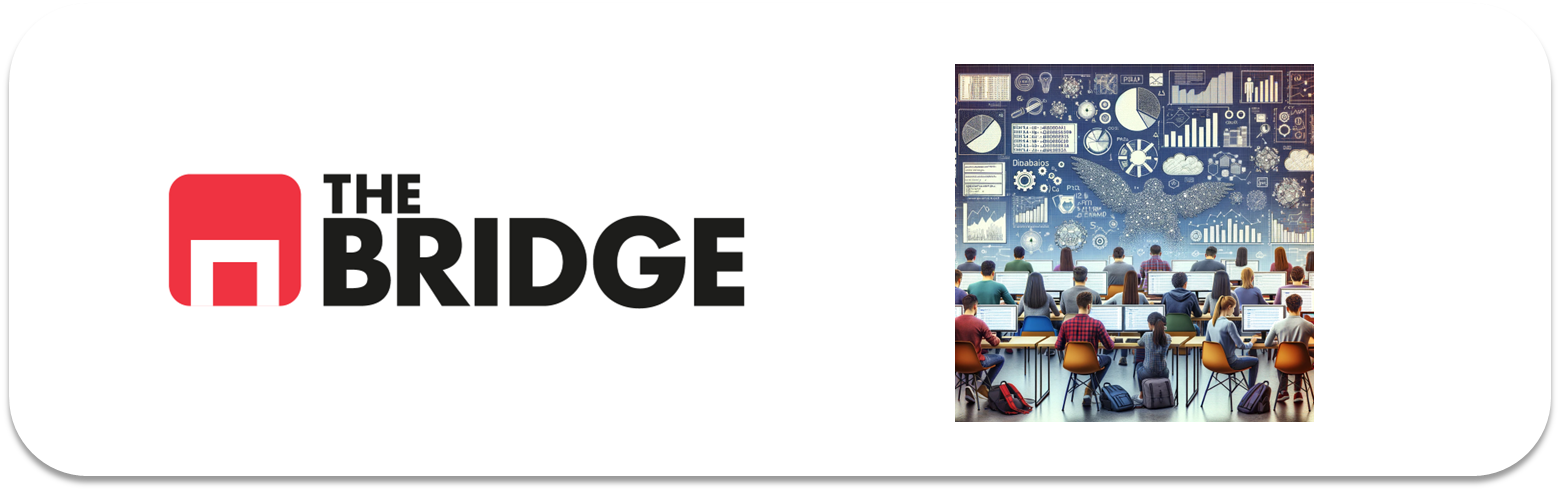

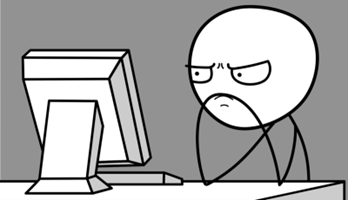

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitar√°s datos que est√°n en el directorio data que acompa√±a al notebook (b√∫scalo en el repositorio de ejercicios)
  
La soluci√≥n a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y m√≥dulos que necesites a lo largo del notebook

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


### Ejercicio 1

Carga el dataset de advertising que encontrar√°s en la carpeta de datos. Muestra su informaci√≥n general. ¬øQu√© te llama la atenci√≥n? ¬øTendremos que limpiar alguna variable?

In [24]:
df_advert = pd.read_csv("./data/advertising_ml.csv")
df_advert.head(10)

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                     68.95  35 years     61833.90                256.09   
1                     80.23  31 years     68441.85                193.77   
2                     69.47  26 years     59785.94                236.50   
3                     74.15  29 years     54806.18                245.89   
4                     68.37   35 a√±os     73889.99                225.58   
5                     59.99   23 a√±os     59761.56                226.74   
6                     88.91   33 a√±os     53852.85                208.36   
7                     66.00   48 a√±os     24593.33                131.76   
8                     74.53   30 a√±os     68862.00                221.51   
9                     69.88   20 a√±os     55642.32                183.82   

                           Ad Topic Line              City  Male     Country  \
0     Cloned 5thgeneration orchestration       Wrightburgh     0     Tunisia   
1     Monitored national standardization         West Jodi     1       Nauru   
2       Organic bottom-line service-desk          Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame    West Terrifurt     1       Italy   
4          Robust logistical utilization      South Manuel     0     Iceland   
5        Sharable client-driven software         Jamieberg     1      Norway   
6             Enhanced dedicated support       Brandonstad     0     Myanmar   
7               Reactive local challenge  Port Jefferybury     1   Australia   
8         Configurable coherent function        West Colin     1     Grenada   
9     Mandatory homogeneous architecture        Ramirezton     1       Ghana   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0  
5  2016-05-19 14:30:17              0  
6  2016-01-28 20:59:32              0  
7  2016-03-07 01:40:15              1  
8  2016-04-18 09:33:42              0  
9  2016-07-11 01:42:51              0

In [25]:
# Supongamos que el dataset se llama df_advert
df_advert.info()
df_advert.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


Daily Time Spent on Site       Age   Area Income  \
count                1000.000000      1000   1000.000000   
unique                       NaN        83           NaN   
top                          NaN  31 years           NaN   
freq                         NaN        34           NaN   
mean                   65.000200       NaN  55000.000080   
std                    15.853615       NaN  13414.634022   
min                    32.600000       NaN  13996.500000   
25%                    51.360000       NaN  47031.802500   
50%                    68.215000       NaN  57012.300000   
75%                    78.547500       NaN  65470.635000   
max                    91.430000       NaN  79484.800000   

        Daily Internet Usage                    Ad Topic Line       City  \
count            1000.000000                             1000       1000   
unique                   NaN                             1000        969   
top                      NaN  Virtual 5thgeneration emulation  Lisamouth   
freq                     NaN                                1          3   
mean              180.000100                              NaN        NaN   
std                43.902339                              NaN        NaN   
min               104.780000                              NaN        NaN   
25%               138.830000                              NaN        NaN   
50%               183.130000                              NaN        NaN   
75%               218.792500                              NaN        NaN   
max               269.960000                              NaN        NaN   

               Male         Country            Timestamp  Clicked on Ad  
count   1000.000000            1000                 1000     1000.00000  
unique          NaN             237                 1000            NaN  
top             NaN  Czech Republic  2016-06-03 21:43:21            NaN  
freq            NaN               9                    1            NaN  
mean       0.481000             NaN                  NaN        0.50000  
std        0.499889             NaN                  NaN        0.50025  
min        0.000000             NaN                  NaN        0.00000  
25%        0.000000             NaN                  NaN        0.00000  
50%        0.000000             NaN                  NaN        0.50000  
75%        1.000000             NaN                  NaN        1.00000  
max        1.000000             NaN                  NaN        1.00000

- "Age" tiene una mezcla de formatos ("a√±os" y "years"), lo que puede requerir una unificaci√≥n.
- "City" y "Country" tienen muchas categor√≠as √∫nicas, lo cual podr√≠a afectar el an√°lisis si hay errores tipogr√°ficos.
- "Timestamp" es una variable de tiempo que puede ser √∫til si la convertimos a formato datetime.
- "Clicked on Ad" parece ser una variable binaria, probablemente indicando si la persona hizo clic en el anuncio o no.
Puedo limpiar:
- Unificar formatos en "Age".
- Convertir "Timestamp" a datetime para facilitar an√°lisis temporales.
- Revisar "City" y "Country" en caso de nombres inconsistentes.
- Codificar "Male" en formato categ√≥rico (0 = Femenino, 1 = Masculino)


### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compa√±√≠a "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campa√±a de anuncios. Hablando con ellos llegamos a la conclusi√≥n de que queremos un modelo para poder predecir si un usuario pulsar√° en el link de un anuncio o no. ¬øQu√© tipo de problemas estamos tratando?¬øY de que tipo de aprendizaje?¬øExiste una variable target que puedas identificar rapidamente?

üìå Tipo de problema
Este es un problema de clasificaci√≥n binaria, ya que queremos predecir si un usuario har√° clic en el anuncio (1) o no (0). En t√©rminos de Machine Learning, estamos tratando con una variable de respuesta dicot√≥mica (dos posibles valores).
üìå Tipo de aprendizaje
Este problema cae dentro del aprendizaje supervisado, porque tenemos datos etiquetados (sabemos qu√© usuarios han hecho clic y cu√°les no). El modelo aprender√° a partir de ejemplos hist√≥ricos con sus respectivas etiquetas y luego generalizar√° para predecir nuevos casos.
üìå Variable target
La variable objetivo es "Clicked on Ad", que indica si un usuario puls√≥ en el anuncio (1) o no lo hizo (0). Esta ser√° la columna que el modelo intentar√° predecir en base a las dem√°s caracter√≠sticas del dataset, como el tiempo en la web, ingresos, edad, uso de internet, etc.


### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definic√≥n de cada columna, obten su cardinalidad y en funci√≥n de esta y del tipo de variable de pandas, clasif√≠calas en categ√≥ricas y num√©ricas.

| **Columna**                    | **Definici√≥n** | **Cardinalidad** | **Tipo** |
|--------------------------------|---------------|----------------|----------|
| **Daily Time Spent on Site**   | Tiempo diario que un usuario pasa en el sitio web. | **1000** | **Num√©rica** (float) |
| **Age**                        | Edad del usuario en a√±os. | **83** | **Num√©rica** (int) |
| **Area Income**                | Ingresos promedio en la zona del usuario. | **1000** | **Num√©rica** (float) |
| **Daily Internet Usage**       | Tiempo diario de uso de internet del usuario. | **1000** | **Num√©rica** (float) |
| **Ad Topic Line**              | Texto del anuncio mostrado al usuario. | **1000** | **Categ√≥rica** (string) |
| **City**                       | Ciudad de residencia del usuario. | **969** | **Categ√≥rica** (string) |
| **Male**                       | G√©nero del usuario (1 = Hombre, 0 = Mujer). | **2** | **Categ√≥rica** (bool/int) |
| **Country**                    | Pa√≠s de residencia del usuario. | **237** | **Categ√≥rica** (string) |
| **Timestamp**                  | Momento en que el usuario vio el anuncio. | **1000** | **Categ√≥rica** (datetime) |
| **Clicked on Ad**              | Indica si el usuario hizo clic en el anuncio (1 = S√≠, 0 = No). | **2** | **Categ√≥rica** (bool/int) |

### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos s√≥lo puedes hacerlo primero con el train, ya explicaremos con detalle por qu√©). 

In [26]:
# Convertir 'Timestamp' a formato datetime
df_advert['Timestamp'] = pd.to_datetime(df_advert['Timestamp'])

# Limpiar 'Age' (extraer solo n√∫meros si hay texto)
df_advert['Age'] = df_advert['Age'].astype(str).str.extract(r'(\d+)').astype(float)

# Convertir 'Male' a tipo categ√≥rico
df_advert['Male'] = df_advert['Male'].astype(bool)

# Normalizar nombres de ciudades y pa√≠ses (quitar espacios y ajustar may√∫sculas)
df_advert['City'] = df_advert['City'].str.strip().str.title()
df_advert['Country'] = df_advert['Country'].str.strip().str.title()

# Eliminar duplicados
df_advert.drop_duplicates(inplace=True)

# Mostrar la informaci√≥n despu√©s de la limpieza
print(df_advert.info())
print(df_advert.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   float64       
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   bool          
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 71.4+ KB
None
   Daily Time Spent on Site   Age  Area Income  Daily 

### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [27]:
# Definir la variable target y las caracter√≠sticas (X = variables predictoras, y = objetivo)
X = df_advert.drop(columns=['Clicked on Ad'])  # Eliminamos la columna target del conjunto de caracter√≠sticas
y = df_advert['Clicked on Ad']  # Definimos la variable objetivo

# Dividir el dataset en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostrar tama√±os de los conjuntos
print(f"Tama√±o del conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"Tama√±o del conjunto de prueba: {X_test.shape[0]} filas")

Tama√±o del conjunto de entrenamiento: 800 filas
Tama√±o del conjunto de prueba: 200 filas


### Ejercicio 6

Haz un peque√±o an√°lisis univariante de las columnas num√©ricas (muestra sus histogramas)

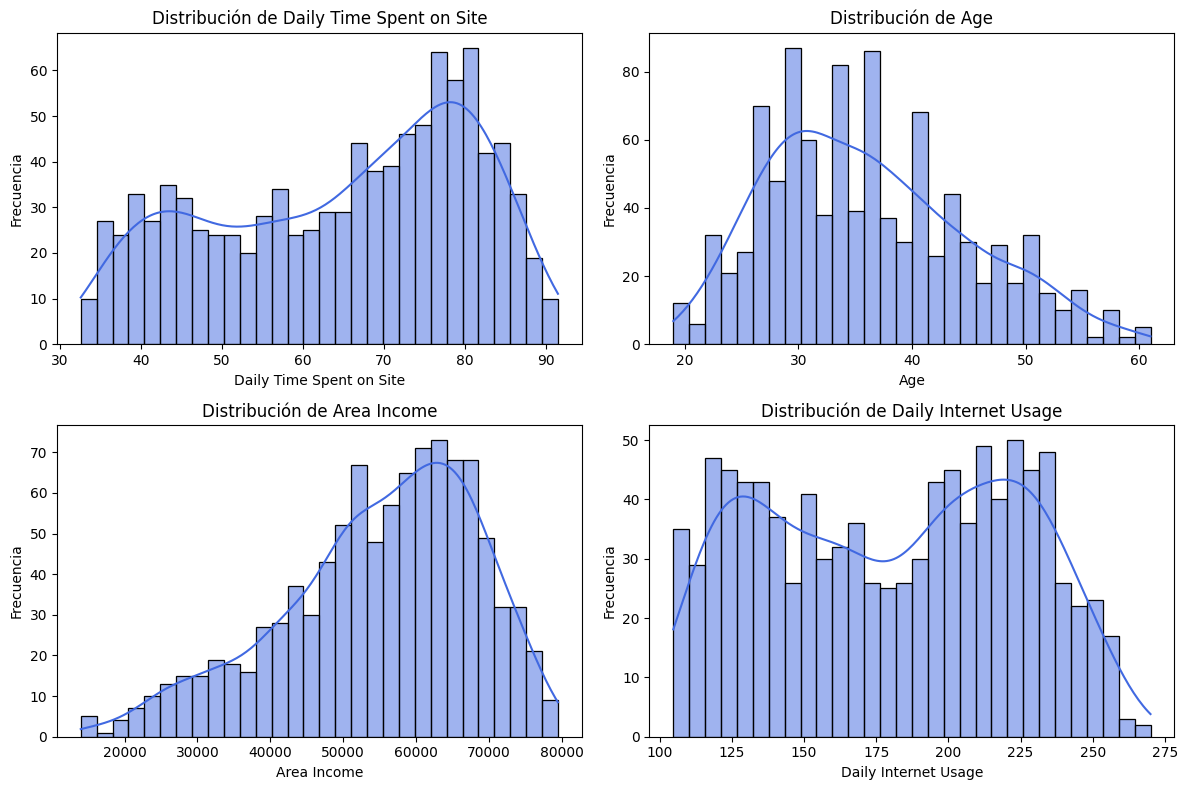

In [ ]:
# Definir las columnas num√©ricas
numeric_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Configurar tama√±o de la figura
plt.figure(figsize=(12, 8))

# Generar histogramas para cada variable num√©rica
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_advert[col], bins=30, kde=True, color='royalblue')
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlaci√≥n)

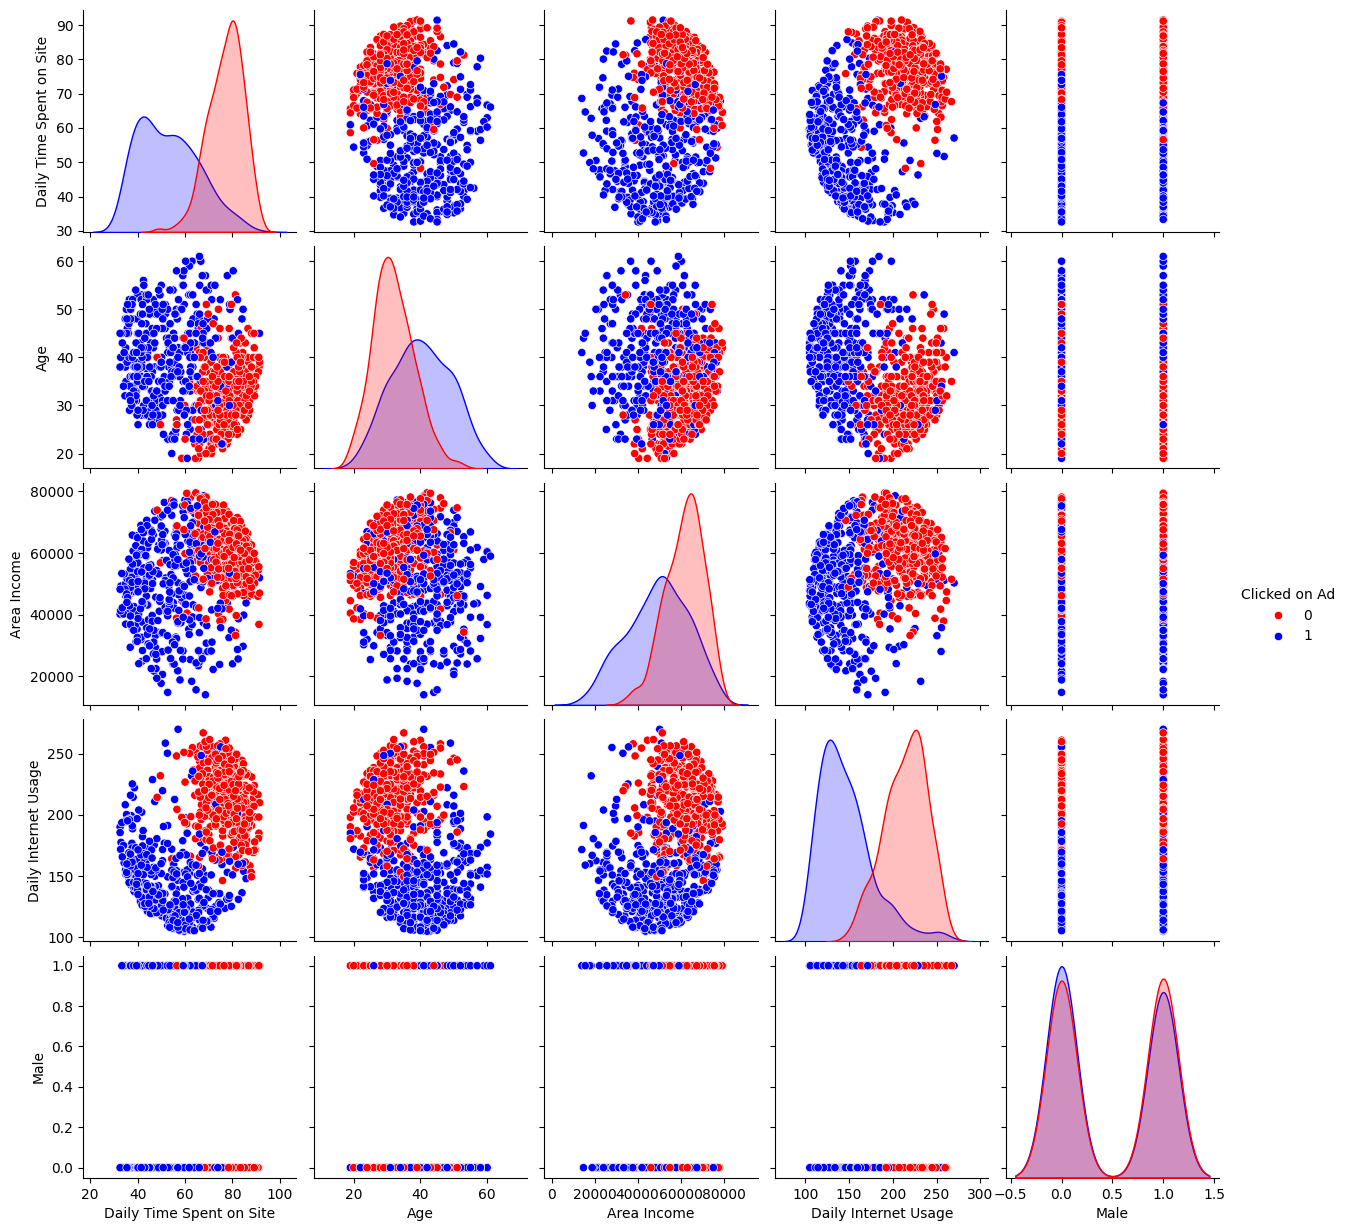

In [30]:
# Unir X_train con y_train para incluir la variable objetivo en el an√°lisis
train_data = X_train.copy()
train_data['Clicked on Ad'] = y_train

# Crear el PairPlot con c√≥digo de color basado en la variable target
sns.pairplot(train_data, hue='Clicked on Ad', palette=['red', 'blue'])

# Mostrar el gr√°fico
plt.show()

### Ejercicio 8

Fij√°ndote en la diagonal principal del gr√°fico anterior haz una selecci√≥n de features:

üìå Selecci√≥n de Features basada en el PairPlot:
- Daily Time Spent on Site ‚Üí Parece mostrar diferencias entre los grupos, lo que sugiere que el tiempo de permanencia en la web influye en la probabilidad de hacer clic.
- Age ‚Üí Hay una separaci√≥n notable entre edades, lo que indica que la edad podr√≠a ser un factor importante en la decisi√≥n de pulsar o no el anuncio.
- Daily Internet Usage ‚Üí Se observan patrones distintos entre usuarios con m√°s o menos uso diario de internet, lo que podr√≠a afectar la interacci√≥n con anuncios.
- Area Income ‚Üí Aunque menos evidente, hay cierta variabilidad que podr√≠a influir en la probabilidad de hacer clic dependiendo del nivel de ingresos.
üìä Variables seleccionadas para el modelo:
‚úî "Daily Time Spent on Site"
‚úî "Age"
‚úî "Daily Internet Usage"
‚úî "Area Income"

